# Mark: 65/100

### Notes: good work, with some problems in later tasks. See my comments below.


# Checkpoint 3

**Due: Friday, 4 December, 2020 at 5:00pm GMT**

### Read This First
1. Use the constants provided in the cell below. Do not use your own constants.

2. Put the code that produces the output for a given task in the cell indicated. You are welcome to add as many cells as you like for imports, function definitions, variables, etc. **Additional cells need to be in the proper order such that your code runs correctly the first time through.**

3. **IMPORTANT!** Before submitting your notebook, clear the output by clicking *Restart & Clear Output* from the *Kernel* menu. If you do not do this, the file size of your notebook will be very large.


# NMR spectrum of water

This problem concerns obtaining the nuclear magnetic resonance (NMR) spectrum of water from a raw NMR signal.

Given: a file containing the free-induction decay signal $y(t)$ (electromagnetic radiation emitted by protons in water), following an RF $\pi$-pulse of f=60MHz. The recorded signal is frequency-subtracted, i.e., the radio-frequency output signal has been mixed with the carrier frequency f=60MHz to shift the signal to lower frequencies in the range of hundreds of Hz.

The signal has three main components: the actual NMR signal from protons in water molecules, white noise, and a 50 Hz "mains hum" (electrical signal picked up by the sensitive NMR detector, coming from the mains AC; the signal also contains higher harmonics).

### Hints on how to solve this checkpoint:
- The code must work (and will be tested on) for other data files, in which the frequency of the water peak may differ by 10%. Any 'fine-tuning' of your algorithms so that they only work for the given data file is therefore discouraged.
- Write the code in a modular way so that you can re-use functions from previous tasks. This will save you a lot of time.
- Do not make the code more complex that it needs to be. Classes, complex data structures etc. are not required for this checkpoint.
- Use NumPy/SciPy functions rather than your own implementation whenever possible.
- As in CP1 and CP2, apart from numerical accuracy, efficiency and coding style will also be marked. Try to make your code readable.
- Comment on the results obtained. This may help to get a better mark if there is a problem with the code.

**There are 6 tasks in this CP worth 100 points, plus a bonus task 7 worth 15 points. The total mark will be the sum of all marks, or 100 points, whichever is lower.**

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas
import time
from scipy import integrate, optimize

In [16]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 16

# Task 1 (15p)

Load the data from the file "signals/water_16_samples.csv" and make a plot of the recorded signal versus time for t=[0,0.05), for the first of the 16 samples. Label the axes.

Each row of the data file (except the first which contains table headings) has the following format:

time, s1, s2, s3, ...

where "time" is in seconds, and s1,s2,s3,... represent the NMR signal (arbitrary units) from independent realisations of the experiment. Differences between the samples should be only due to noise; it is the same experiment repeated 16  times.

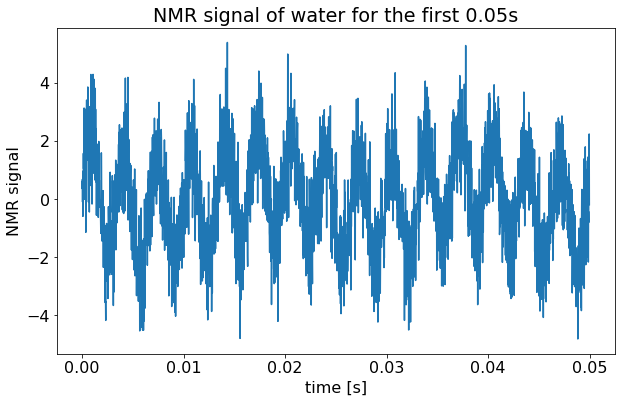

In [17]:
# YOUR CODE HERE: Read the given .csv file for NMR signal of water
data = pandas.read_csv('../../signals/water_16_samples_v3.csv')
# Extract the data for time and first measurement
s1 = data['s1']
t = data['t']
# Initialise the given time t0 = 0.05 [s]
t0 = 0.05
# Work out the interval time and the length of numpy arrays desired, or more specifically,
# the number of points required for time interval (0, 0.05)s
d_t = ( max(t) - min(t) ) / len(t)
N = int(t0 / d_t)
# Plot the results
plt.plot(t[:N], s1[:N])
plt.title('NMR signal of water for the first 0.05s')
plt.xlabel('time [s]')
plt.ylabel('NMR signal')
plt.show()


## A slightly awkward way of selecting the first 0.05s of data. Using masking  ("t[t<0.05]") would make the code much shorter
## Mark: 12/15

# Task 2 (15p)

Calculate the amplitude spectrum of the NMR signal, and plot it as a function of frequency f [Hertz], for f=0 to 500 Hz. Assume the length of the time series is tmax=0.5s.

**Note: in workshop, you have been plotting wavenumber ($k = \frac{2\pi}{\lambda}$), whereas frequency is $f = \frac{1}{\lambda}$.**

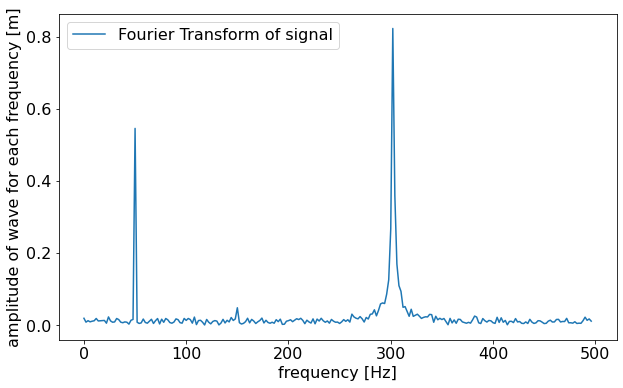

In [18]:
# YOUR CODE HERE
# Create a function for FFT of the read file
# More general functions will be created for any numpy array. This is because of task 7,
# where all the files will have to be read
def FFT_file(arr):
    
    # Compute the FFT for the given NMR signal
    y = np.fft.rfft(arr)
    # hh = abs(y[:L])
    # Choose the threshold frequency of 500 Hz
    freq0 = 500
    # Convert the frequency to the upper limit on the x-axis
    L_0 = int(freq0 * t.max())
    L = min(L_0, y.size)
    return y,L

# Plot the Fourier spectrum for the signal
y, L = FFT_file(s1) 
freq = np.linspace(0, (L-1) / t.max(), L)
plt.plot(freq, 2 * abs(y[:L]) / t.size, label='Fourier Transform of signal')
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude of wave for each frequency [m]')
plt.legend()
plt.show()

## Again, frequency selection could have been implemented more efficiently.
## Mark: 12/15

# Task 3 (15p)

Filter out the noise by passing the signal through a bandpass filter centered at the water peak with a width $\pm$30 Hz. Plot the filtered signal y(t) for t=[0,0.5).

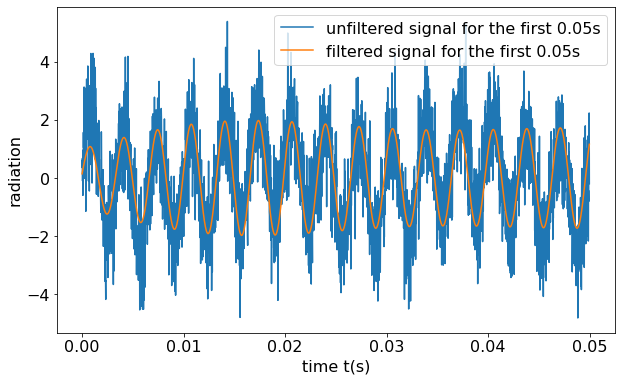

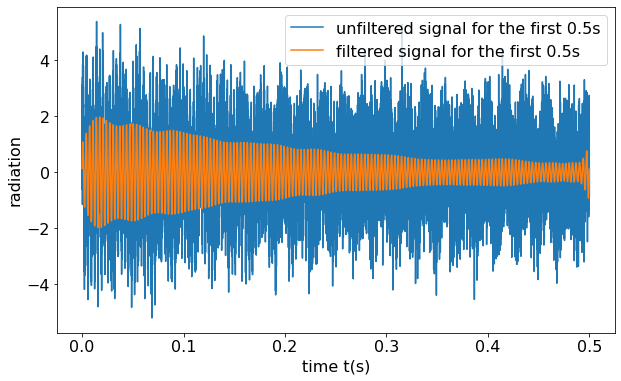

In [19]:
# YOUR CODE HERE
# Define function for Inverse FFT of a given array
def IRFFT_file(arr):
    
    # Take the peak of the signal
    y,L = FFT_file(arr)
    hh = y[:L]
    imax = np.abs(y[:L]).argmax()
    # Remove all the frequencies not belonging to the peak
    y[:L][np.abs(freq - freq[imax]) > 30] = 0 
    # As the analyzed frequencies have the range wider than (0,500)Hz, 
    # set all the larger frequencies to 0 as well
    y[-(y.size - L):] = 0
    # Apply the Inverse Fast Fourier Transform
    y2 = np.fft.irfft(y)
    return y,y2

# Plot the filtered signal for the first 0.05s
y_ifft,y2 = IRFFT_file(s1)
plt.plot(t[:N],s1[:N],label='unfiltered signal for the first 0.05s')
plt.plot(t[:N],y2[:N],label='filtered signal for the first 0.05s')
plt.xlabel('time t(s)')
plt.ylabel('radiation')
plt.legend()
plt.show()

# Plot the filtered signal for the first 0.5s
plt.plot(t,s1,label='unfiltered signal for the first 0.5s')
plt.plot(t,y2,label='filtered signal for the first 0.5s')
plt.xlabel('time t(s)')
plt.ylabel('radiation')
plt.legend()
plt.show()

## Mark: 14/15
## It's very good that you have plotted both unfiltered and filtered signals to better see the difference. One point taken for data selection issues (as in tasks 1-2).

# Task 4 (20p)

Use non-linear curve fitting to fit the function:

$
\Large
\begin{align}
y_{\rm theor}(t) = A \sin(2\pi f_0 t) e^{-t/t_0}
\end{align}
$

to the filtered signal for t=[0,tmax), with unknown parameters $A, f_0, t_0$. Find and print out the best-fit frequency $f_0$. The frequency should be accurate to within 0.01 Hz of the correct answer.

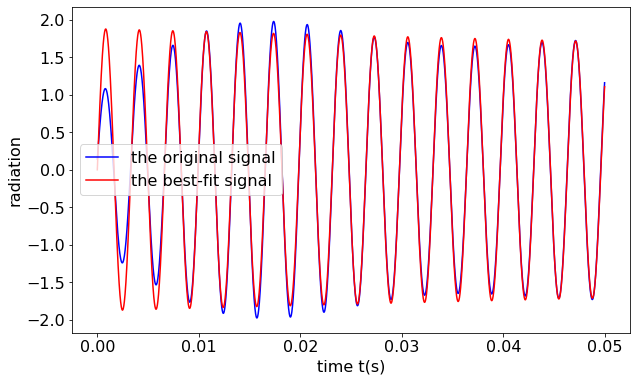

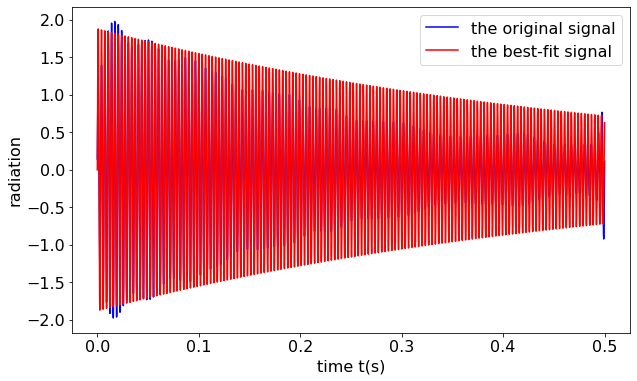

The frequency of the signal is: 302.3476042020159 Hz


In [20]:
# YOUR CODE HERE
from scipy.optimize import curve_fit

def find_t0(arr):
    
    # Initially, only the peaks of the filtered signal are selected, in order to work out the amplitude of the signal 
    # and the characteristic time decay, using the trial function find_exp
    def find_exp(t,A,t0):
        return A * np.exp(-t/t0)

    # Take the peaks of the signal using np.where command
    y_ifft, y2 = IRFFT_file(arr)
    peaks = np.where((np.diff(y2[:-1]) > 0) & (np.diff(y2[1:]) < 0))[0] + 1
    # curve_fit function is applied for working out the best-fit parameters, given by popt
    popt, pcov = curve_fit(find_exp, t[peaks], y2[peaks], sigma=None, p0=np.array([1,0.2]))
    
    return popt[0], popt[1]

A_fit, t0_fit = find_t0(s1[:N])
y_fit = A_fit * np.exp(-t / t0_fit)

# Now that the amplitude and characteristic time decay have been worked out, curve_fit function
# is used for determining the third parameter: the frequency f0
def find_curve(t,f0):  
    return A_fit * np.sin(2 * np.pi * f0 * t) * np.exp(-t/t0_fit)
# Again, the curve_fit function has been used. Moreover, pcov has also been evaluated, 
# as t gives the error in parameter estimation. pcov has been found to have the smallest value for 308 Hz
popt, pcov = curve_fit(find_curve, t[:N], y2[:N], sigma=None, p0=308)
y_thr = find_curve(t, popt[0])

# The original filtered signal and the best-fit exponentially decaying signal are plotted
# both for 0.05s and 0.5s
plt.plot(t[:N],y2[:N],'b',label='the original signal')
plt.plot(t[:N],y_thr[:N],'r',label='the best-fit signal')
plt.xlabel('time t(s)')
plt.ylabel('radiation')
plt.legend()
plt.show()

plt.plot(t,y2,'b',label='the original signal')
plt.plot(t,y_thr,'r',label='the best-fit signal')
plt.xlabel('time t(s)')
plt.ylabel('radiation')
plt.legend()
plt.show()

print("The frequency of the signal is: " + str(popt[0]) + " Hz")

## This is an intersting approach: you fit (t0,A) and f0 independently. However, this is not quite correct; the distance function between the theoretical curve and the data is not a product of distance_1(t0,A) * distance_2(f0), only if this was the case your method would work. You should have searched for best fit in all three parameters. The correct answer is 320.40.
## Mark: 12/20

# Task 5 (20p)

Determine $f_0$ in a different way: find the position of the water peak in the amplitude spectrum by fitting the curve

$
\large
\begin{align}
\tilde{y}_{\rm theor}(f) = C + \frac{A}{\sqrt{\lambda^4 + (f^2 - f_0^2)^2 + 2 \lambda^2(f^2 + f_0^2))}}
\end{align}
$

This curve comes from Fourier-transforming the exponentially damped sine function from the previous task, plus a constant C to account for background noise. $\lambda$ denotes the damping rate (inversely proportional to $t_0$ from task 4).

As before, use only the first of the 16 samples for this task. The frequency should be accurate to within 0.01 Hz of the correct answer.

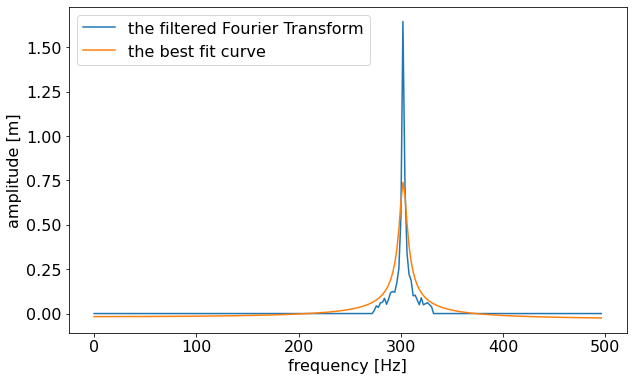

The best-fit frequency f0 is: f0 = 302.3028367770565 Hz


In [21]:
# YOUR CODE HERE
# Create function for determining frequency f0
def find_f0(arr):
    
    # Use the best-fit t0 from the last exercise to find parameter lambda
    A_fit, t0_fit = find_t0(arr)
    lamda = 1/t0_fit

    # Use the model function for curve with spike at f0
    def y_t(f,C,A,f0):
        return C + A / np.sqrt(lamda**4 + (f**2 - f0**2)**2 + 2 * lamda**2 * (f**2 + f0**2))
    
    # Calculate the Inverse FFT of a given array
    y_ifft, y2 = IRFFT_file(arr)
    # Return the best-fit parameters and the errors in estimation
    popt, pcov = curve_fit(y_t, freq, 2 * abs(y_ifft[:L])/y.size, p0=np.array([0.02,0.8,308]))
    # Return the best-fit function
    y_thr = y_t(freq, popt[0], popt[1], popt[2])
    # print(popt)
    return popt, y_thr

y_ifft, y2 = IRFFT_file(s1)
popt, y_thr = find_f0(s1)

plt.plot(freq,2*abs(y_ifft[:L])/y.size,label='the filtered Fourier Transform')
plt.plot(freq,y_thr,label='the best fit curve')
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude [m]')
plt.legend()
plt.show()
print("The best-fit frequency f0 is: f0 = " + str(popt[2]) + " Hz")

## Same problem as before (not fitting all parameters at once). You can see from the plot that the function does not really fit the data due to the "fit" not being the true minimum. You shouldn't also be fitting outside the filtered area, because the theoretical function is not valid there (since you've put FFT=0 there). The correct answer is 302.38 for this task.
## Mark: 10/20

# Task 6 (15p)

Determine the frequency $f_0$ for all 16 data sets using the method from Task 5. Calculate mean $f_0$ and its standard error. The frequency should be accurate to within 0.01 Hz of the correct answer and the standard error should be within 1%.

In [22]:
# YOUR CODE HERE
# Read all the samples from the 16 files and compute the mean frequency f0
# Create an initial array of 16 numbers of 0
freq_f0 = np.zeros(16)
for i in range(16):
    # For each element in the loop, read a file
    str_0 = 's' + str(i+1)
    # Denote the array
    s_i = np.copy(data[str_0])
    # Find the best fit parameters for each curve-fitting of Fourier Transform of signal.
    # Only the 3rd parameter corresponds to frequency f0
    popt,y_thr = find_f0(s_i)
    freq_f0[i] = popt[2]
    
mu = np.mean(freq_f0)
sigma = np.std(freq_f0)
print("The mean value and the standard deviation of the sample are: mu = " + str(mu) + " and sigma = " + str(sigma))

The mean value and the standard deviation of the sample are: mu = 302.2944389433259 and sigma = 0.02806824872720498


## Problem with determination of f0 propagates here. Also, std() is not the standard error, you need to divide by sqrt(no. of samples). Correct value should be 302.400+/-0.009
## Mark: 5/15

# Bonus: Task 7 (15p)

Find the 95% equally-tailed credible interval of $f_0$ from task 5 using Bayesian inference.

Use only the first of the 16 samples for this task. Assume the spectrum can be modelled by the curve from task 5, with $C=0$ and random noise superimposed on the curve. The noise should be generated as independent, identically distributed random numbers $\{\chi_k\}$ drawn from the Chi distribution with two degrees of freedom and unknown amplitude $\sigma$, so that the amplitude spectrum is

$
\large
\begin{align}
\tilde{y}_k = \frac{A}{\sqrt{\lambda^4 + (f_k^2 - f_0^2)^2 + 2\lambda^2(f_k^2 + f_0^2))}} + \sigma \chi_k
\end{align}
$

where $f_k = k/t_{max}$. The rationale for using the Chi distribution comes from Fourier-transforming Gaussian noise and taking its modulus (to plot the amplitude spectrum).

Does the average value of $f_0$ obtained in task 6 lie in the credible interval? The bounds of the interval should be accurate to within 0.01 Hz of the correct answer.

In [ ]:
# YOUR CODE HERE